<a href="https://colab.research.google.com/github/HimAir10/Pw-skillsAssignment/blob/main/Assignment_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. What is Boosting in Machine Learning? Explain how it improves weak
learners.
    -> Boosting in Machine Learning is an ensemble technique that combines multiple weak learners, usually simple models like decision stumps, to form a strong predictive model. It works by training models sequentially, where each new model focuses more on the errors made by the previous ones.

    This process reduces bias and variance, as the weak learners collectively compensate for each other’s limitations. By giving higher weights to misclassified instances, boosting ensures that difficult cases are handled better, ultimately improving overall accuracy.

2. What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?
    -> AdaBoost and Gradient Boosting both build models sequentially, but they differ in how they correct errors. AdaBoost adjusts the weights of misclassified samples, making the next weak learner focus more on those difficult cases. The final prediction is made by combining all learners with weighted votes.

    Gradient Boosting, on the other hand, trains each new model to fit the residual errors of the previous model. It uses gradient descent to minimize a specified loss function, allowing more flexibility in handling regression and classification problems compared to AdaBoost.  

3. How does regularization help in XGBoost?
    -> Regularization in XGBoost helps prevent overfitting by adding penalty terms to the objective function. These penalties control the complexity of the model by discouraging overly large weights and very deep trees.

    By including both L1 (Lasso) and L2 (Ridge) regularization, XGBoost balances sparsity and smoothness in the model. This ensures that the model generalizes better to unseen data while still maintaining high predictive power.

4. Why is CatBoost considered efficient for handling categorical data?
    -> CatBoost is considered efficient for handling categorical data because it automatically converts categorical features into numerical values using techniques like target statistics and ordered boosting, eliminating the need for manual preprocessing such as one-hot encoding. This reduces data sparsity and training time.

    Additionally, CatBoost uses permutation-driven methods to avoid target leakage and overfitting, ensuring more reliable transformations. These built-in mechanisms make it especially powerful and efficient when working with datasets that contain many categorical variables.    

5.  What are some real-world applications where boosting techniques are
preferred over bagging methods?
    -> Boosting techniques are often preferred in real-world applications where high accuracy and fine error correction are critical. For example, in fraud detection, boosting can focus on rare but important fraudulent patterns that bagging might overlook.

    Similarly, in medical diagnosis and credit risk assessment, boosting helps capture subtle data patterns by giving more attention to misclassified cases. It is also widely used in ranking problems like search engines and recommendation systems, where precise predictions are more valuable than general robustness.  
      

In [1]:
# 6).  Write a Python program to:
# Train an AdaBoost Classifier on the Breast Cancer dataset
# Print the model accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
x, y = data.data, data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy = ", accuracy)

Accuracy =  0.9736842105263158


In [2]:
# 7). Write a Python program to:
# Train a Gradient Boosting Regressor on the California Housing dataset
# Evaluate performance using R-squared score

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

data = fetch_california_housing()
x, y = data.data, data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print("R-squared Score: ", r2)

R-squared Score:  0.8003636552408364


In [3]:
# 8). Write a Python program to:
# Train an XGBoost Classifier on the Breast Cancer dataset
# Tune the learning rate using GridSearchCV
# Print the best parameters and accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

data = load_breast_cancer()
x, y = data.data, data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=1)

param_grid = {"learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3]}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(x_train, y_train)
print("Best Params:", grid_search.best_params_)

Best Params: {'learning_rate': 0.3}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:05:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [4]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", accuracy)

XGBoost Accuracy: 0.956140350877193


In [5]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [6]:
#  9) Write a Python program to:
# Train a CatBoost Classifier
# Plot the confusion matrix using seaborn


from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, accuracy_score
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

data = load_breast_cancer()
x, y = data.data, data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=0, random_state=1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1])

CatBoost Accuracy: 0.9649122807017544


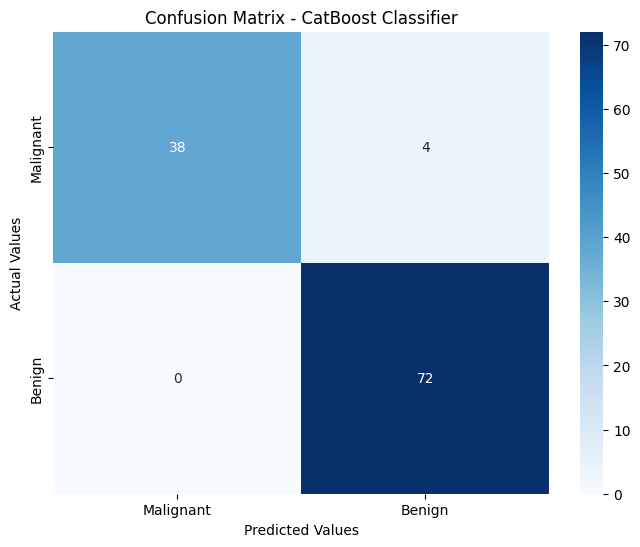

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print("CatBoost Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()

10. You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model

    ->
    Data preprocessing & handling missing/categorical values: I would handle missing values using median/mode imputation or let algorithms like CatBoost manage them natively. For categorical features, CatBoost’s internal encoding or target encoding with K-fold strategy can be applied. Numeric features would be capped for outliers, and imbalance addressed using class weights or threshold tuning instead of naive oversampling.

    Choice between AdaBoost, XGBoost, or CatBoost: CatBoost is the best choice here because it directly handles categorical and missing values while reducing leakage. XGBoost is a good alternative if more control or integration is required, with proper encoding and scale_pos_weight. AdaBoost is simpler but less effective on complex, imbalanced financial datasets.

    Hyperparameter tuning strategy: I would use stratified cross-validation and early stopping. A randomized or Bayesian search would help tune learning rate, depth, n_estimators, regularization, and sampling ratios. For imbalanced data, class weights or scale_pos_weight would be included, followed by threshold tuning to align with business costs.

    Evaluation metrics & why: PR-AUC would be the primary metric since defaults are rare, supported by ROC-AUC for ranking quality. Precision, recall, and F1 at the chosen threshold would highlight trade-offs, while KS-statistic and calibration plots would ensure good probability estimation.

    Business benefit: The model would reduce loan default risk by flagging high-risk customers while safely approving low-risk ones. This improves profit margins, supports fair interest pricing, and enhances compliance with explainable outputs, ultimately helping the company manage risk and grow sustainably.